## Overview

#### This notebook was created by 
* Heejung Jung
* Xiaochun Han
* Deepanshi Shokeen

#### Project: MVPC – classify behaving animal data in searchlights using SVM
* P1. 1 out of 20 conditions
* P2. Classify taxa (1 out of 5), training on videos with 3 behaviors and testing on videos with the left-out behavior.
* P3. Classify behaviors (1 out of 4), training on videos with 4 taxa and testing on videos with left-out taxonomic category

#### Parameters:
* The 3 analyses (P1, P2, P3) were conducted separately for the attention and behavioral task.
* search light radii: 10

#### Analysis involved
1. **GLM**: modeled 20 separate regressors with nuisance regressors derived from fmriprep
2. **searchlight**: using a 10 radius, pattern classification was performed <br>using a linear SVM classifier within a surface-based searchlight, conducted per participant.
3. **group average searchlight one-sample t-test & two-sample t-test**<br>

  *1) one-sample t-test*
    * Group average searchlight maps were compared against the chance performance 
    * chance performance was 0.05 for P1, 0.2 for P2, 0.25 for P3

  *2) two-sample t-test*
    * For example, for the behavior classification for beh attention > tax attention task
    * We hypothesized that the behavioral classification performance would be higher for the 
behavior-attention task, as opposed to the taxonomy-attention task. 

   *Note that we used a one-sided uncorrected p-value of 0.05.

4. **visualization** of group average searchlight one-sample t-test & two-sample t-test
    
    
#### Explanation about the 1 - cross validation 
* We realized in that in our code, we simply ran 
```cv = mv.CrossValidation(clf, mv.NFoldPartitioner(attr=chunks)).```

* After realizing that the default was ```mv.mean_mismatch_error```<br> 
we subtracted the searchlight outputs from 1, <br>
in order to account for the fact that we calculated the average mismatch error.



In [2]:
# load libraries
import os
import numpy as np
import mvpa2
import pandas as pd
# from mvpa2.tutorial_suite import *
import nilearn as nl
import nipy
import mvpa2.suite as mv
import nibabel
from numpy.testing.decorators import skipif
import scipy
from nilearn.plotting import plot_surf
import matplotlib.pyplot as plt

/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/pydicom/__init__.py:55: DeprecationWarning: Python 2 will no longer be supported after the pydicom v1.4 release
  warnings.warn(msg, DeprecationWarning)
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/_pytest/mark/structures.py:383: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/nipy/testing/decorators.py:11: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import *
/User

In [3]:
# main_dir = '/dartfs-hpc/scratch/psyc164/groupXHD'
main_dir = '/Users/h/Documents/projects_local/cluster_projects'

## function for stacking searchlight outputs and performing one-sample t's

In [4]:
def searchlight_significance(sub_name_list, proj_num, task_name, search_dir, hemi, one_st):
    data_set = []
    for sub_name in sub_name_list:
        ds=[]
        sub_file_name = os.path.join(search_dir, sub_name, 
                                     sub_name+'_ques-0'+str(proj_num)+'_task-'+task_name+'_'+hemi+'_searchlight_radii-10.0.niml.dset')
        ds = mv.niml.read(sub_file_name)
        data_set.append(ds)
    group_ds = mv.vstack(data_set)   

    one_sample_t = scipy.stats.ttest_1samp(group_ds, one_st,axis=1)
    mean_ds = np.mean(group_ds.samples,axis = 0)
    mean_accuracy = 1-mean_ds
    # t.inv(0.05, 11, ) = -1.795
    mean_accuracy[list(np.where(  abs(one_sample_t.statistic) < 1.795)[0])] = 0

    return group_ds, mean_accuracy

# P1. 1-out-of-20 classification
* creates an average of the searchlight maps (across "run" folds)
* computes a one-sample t-test against the chance classification performance of 1/20.
* separately plots 1-out-of-20 classification for <br> 1) taxonomy attention task and <br>2) behavior attention task

## 1-1. 1-out-of 20 one sample t-test

In [5]:
sub_name_list = ['sub-rid000001', 'sub-rid000012', 'sub-rid000017',
"sub-rid000024", "sub-rid000027", "sub-rid000031",
"sub-rid000032", "sub-rid000033", "sub-rid000034",
"sub-rid000036", "sub-rid000037", "sub-rid000041"]
searchlight_dir = '/Users/h/Documents/projects_local/cluster_projects/analysis/searchlight'

cl20_behtask_L,mean_cl20_behtask_L = searchlight_significance(sub_name_list, proj_num=1,task_name='beh',search_dir=searchlight_dir, hemi='lh',one_st=0.05)
cl20_behtask_R,mean_cl20_behtask_R = searchlight_significance(sub_name_list, proj_num=1,task_name='beh',search_dir=searchlight_dir, hemi='rh',one_st=0.05)
cl20_taxtask_L,mean_cl20_taxtask_L = searchlight_significance(sub_name_list, proj_num=1,task_name='tax',search_dir=searchlight_dir, hemi='lh',one_st=0.05)
cl20_taxtask_R,mean_cl20_taxtask_R = searchlight_significance(sub_name_list, proj_num=1,task_name='tax',search_dir=searchlight_dir, hemi='rh',one_st=0.05)

/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/mvpa2/support/nibabel/afni_niml.py:182: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data_1d = np.fromstring(s, dtype=tp)


/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


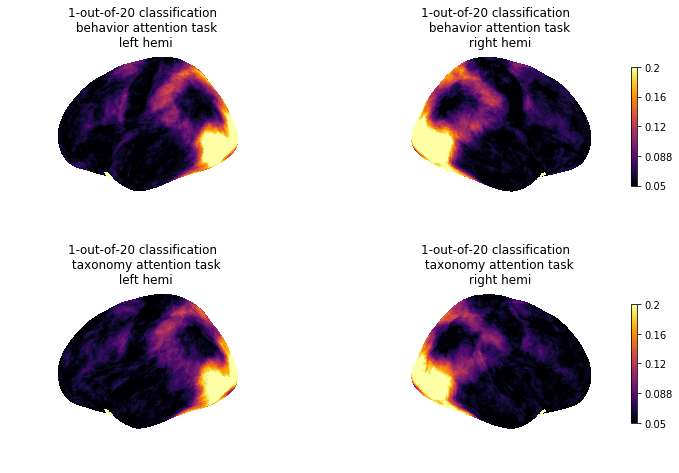

In [6]:
from nilearn.plotting import plot_surf
fsaverage_gii_L = os.path.join(main_dir , 'fs_templates', 'lh.pial.gii')
fsaverage_gii_R = os.path.join(main_dir , 'fs_templates', 'rh.pial.gii')
fsaverage_inflated_L = os.path.join(main_dir , 'fs_templates', 'lh.inflated.gii')
fsaverage_inflated_R = os.path.join(main_dir , 'fs_templates', 'rh.inflated.gii')

# f, axs = plt.subplots(2, 2)
figure, axes = plt.subplots(2,2,subplot_kw={'projection': '3d'},figsize = (12,8))
plot_surf(fsaverage_inflated_L,mean_cl20_behtask_L, 
          title='1-out-of-20 classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.05, vmax=.20, cmap = 'inferno',axes=axes[0][0])
plot_surf(fsaverage_inflated_R,mean_cl20_behtask_R, colorbar = True,
          title='1-out-of-20 classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.05, vmax=.20, cmap = 'inferno',axes=axes[0][1])
plot_surf(fsaverage_inflated_L,mean_cl20_taxtask_L, 
          title='1-out-of-20 classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.05, vmax=.20, cmap = 'inferno',axes=axes[1][0])
plot_surf(fsaverage_inflated_R,mean_cl20_taxtask_R, colorbar = True,
          title='1-out-of-20 classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.05, vmax=.20, cmap = 'inferno',axes=axes[1][1])
plt.show()

## 1-2. two-sample t-test

In [7]:
q1_t_sample_L = scipy.stats.ttest_ind(cl20_behtask_L , cl20_taxtask_L)
q1_behtask_L = np.mean(cl20_behtask_L.samples,axis = 0)
q1_taxtask_L = np.mean(cl20_taxtask_L.samples,axis = 0)
q1_diff_L = q1_behtask_L-q1_taxtask_L
q1_diff_L[list(np.where(  abs(q1_t_sample_L.statistic) < 2.20)[0])] = 0

q1_t_sample_R = scipy.stats.ttest_ind(cl20_behtask_R , cl20_taxtask_R)
q1_behtask_R = np.mean(cl20_behtask_R.samples,axis = 0)
q1_taxtask_R = np.mean(cl20_taxtask_R.samples,axis = 0)
q1_diff_R = q1_behtask_R-q1_taxtask_R
q1_diff_R[list(np.where(  abs(q1_t_sample_R.statistic) < 2.20)[0])] = 0



/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


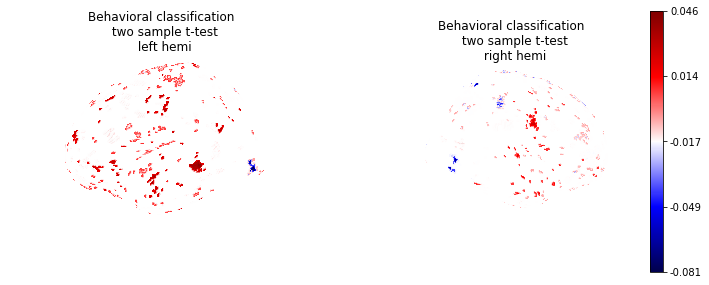

In [24]:
figure, axes = plt.subplots(1,2,subplot_kw={'projection': '3d'},figsize = (12,8))
# , axes=axes[0]
# ,axes=axes[1]
plot_surf(fsaverage_inflated_L,q1_diff_L,  
          title='Behavioral classification \n two sample t-test\n left hemi', 
          hemi='left', view = 'lateral', cmap = 'seismic',axes=axes[0])

plot_surf(fsaverage_inflated_R,q1_diff_R,  colorbar = True, 
          title='Behavioral classification \n two sample t-test\n right hemi', 
          hemi='right', view = 'lateral', cmap = 'seismic',axes=axes[1])
plt.show()

# P2. taxonomy classification
* creates an average of the searchlight maps (across chunks, i.e. taxa cv)
* computes a one-sample t-test against the chance classification performance of 1/5.
* separately plots taxonomy classification for 
    1) taxonomy attention task and 
    2) behavior attention task



## 2-1. taxonomy clssification - one-sample t-test

In [9]:
sub_name_list = ['sub-rid000001', 'sub-rid000012', 'sub-rid000017',
"sub-rid000024", "sub-rid000027", "sub-rid000031",
"sub-rid000032", "sub-rid000033", "sub-rid000034",
"sub-rid000036", "sub-rid000037", "sub-rid000041"]
searchlight_dir = '/Users/h/Documents/projects_local/cluster_projects/analysis/searchlight'

cltax_behtask_L,mean_cltax_behtask_L = searchlight_significance(sub_name_list, proj_num=2,task_name='beh',search_dir=searchlight_dir, hemi='lh',one_st=0.20)
cltax_behtask_R,mean_cltax_behtask_R = searchlight_significance(sub_name_list, proj_num=2,task_name='beh',search_dir=searchlight_dir, hemi='rh',one_st=0.20)
cltax_taxtask_L,mean_cltax_taxtask_L = searchlight_significance(sub_name_list, proj_num=2,task_name='tax',search_dir=searchlight_dir, hemi='lh',one_st=0.20)
cltax_taxtask_R,mean_cltax_taxtask_R = searchlight_significance(sub_name_list, proj_num=2,task_name='tax',search_dir=searchlight_dir, hemi='rh',one_st=0.20)

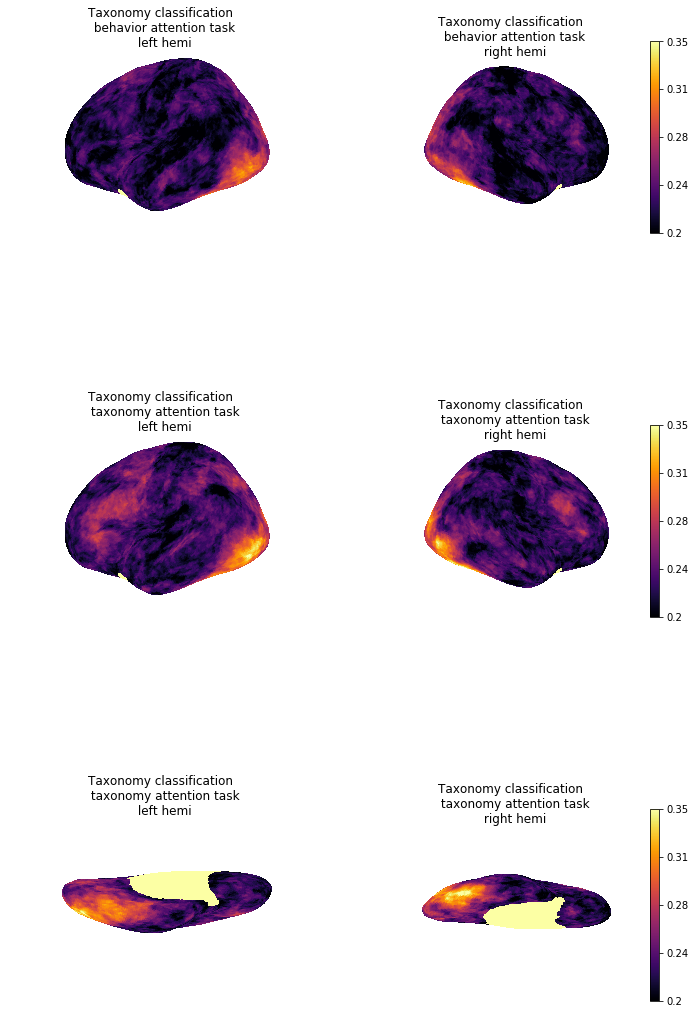

In [22]:
from nilearn.plotting import plot_surf
fsaverage_gii_L = os.path.join(main_dir , 'fs_templates', 'lh.pial.gii')
fsaverage_gii_R = os.path.join(main_dir , 'fs_templates', 'rh.pial.gii')
fsaverage_inflated_L = os.path.join(main_dir , 'fs_templates', 'lh.inflated.gii')
fsaverage_inflated_R = os.path.join(main_dir , 'fs_templates', 'rh.inflated.gii')

figure, axes = plt.subplots(3,2,subplot_kw={'projection': '3d'},figsize = (12,20))

# plot_surf(fsaverage_gii,np.mean(group_ds,axis = 0),colorbar = True)
plot_surf(fsaverage_inflated_L,mean_cltax_behtask_L, 
          title='Taxonomy classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][0])
plot_surf(fsaverage_inflated_R,mean_cltax_behtask_R,  colorbar = True, 
          title='Taxonomy classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L, 
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L,
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][1])
plt.show()

## 2-2. taxonomy two-sample t-test (tax > beh)

In [28]:
q2_t_sample_L = scipy.stats.ttest_ind(cltax_behtask_L , cltax_taxtask_L)
q2_behtask_L = np.mean(cltax_behtask_L.samples,axis = 0)
q2_taxtask_L = np.mean(cltax_taxtask_L.samples,axis = 0)
q2_diff_L = q2_taxtask_L-q2_behtask_L
q2_diff_L[list(np.where(  abs(q2_t_sample_L.statistic) < 2.20)[0])] = 0

q2_t_sample_R = scipy.stats.ttest_ind(cltax_behtask_R , cltax_taxtask_R)
q2_behtask_R = np.mean(cltax_behtask_R.samples,axis = 0)
q2_taxtask_R = np.mean(cltax_taxtask_R.samples,axis = 0)
q2_diff_R =q2_taxtask_R -q2_behtask_R
q2_diff_R[list(np.where(  abs(q2_t_sample_R.statistic) < 2.20)[0])] = 0



/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


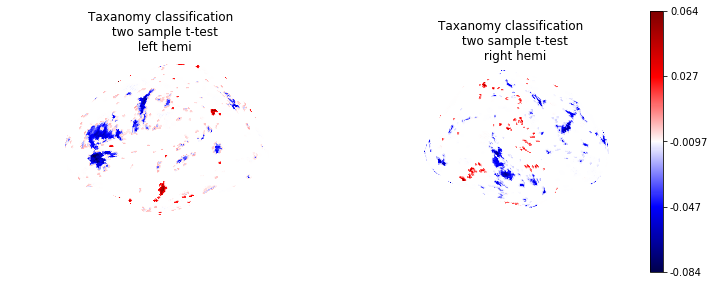

In [29]:
figure, axes = plt.subplots(1,2,subplot_kw={'projection': '3d'},figsize = (12,8))

plot_surf(fsaverage_inflated_L,q2_diff_L,  
          title='Taxanomy classification \n two sample t-test\n left hemi', 
          hemi='left', view = 'lateral', cmap = 'seismic',axes=axes[0])

plot_surf(fsaverage_inflated_R,q2_diff_R,  colorbar = True, 
          title='Taxanomy classification \n two sample t-test\n right hemi', 
          hemi='right', view = 'lateral', cmap = 'seismic',axes=axes[1])
plt.show()

# P3. behavior classification

## 3-1. behavior classification - one sample t-test 
* The following code creates an average of the searchlight maps (across chunks, i.e. taxa cv) <br> and computes a one-sample t-test against the chance classification performance of 1/4. 

In [13]:
sub_name_list = ['sub-rid000001', 'sub-rid000012', 'sub-rid000017',
"sub-rid000024", "sub-rid000027", "sub-rid000031",
"sub-rid000032", "sub-rid000033", "sub-rid000034",
"sub-rid000036", "sub-rid000037", "sub-rid000041"]
searchlight_dir = '/Users/h/Documents/projects_local/cluster_projects/analysis/searchlight'

clbeh_behtask_L,mean_clbeh_behtask_L = searchlight_significance(sub_name_list, proj_num=3,task_name='beh',search_dir=searchlight_dir, hemi='lh',one_st=0.25)
clbeh_behtask_R,mean_clbeh_behtask_R = searchlight_significance(sub_name_list, proj_num=3,task_name='beh',search_dir=searchlight_dir, hemi='rh',one_st=0.25)
clbeh_taxtask_L,mean_clbeh_taxtask_L = searchlight_significance(sub_name_list, proj_num=3,task_name='tax',search_dir=searchlight_dir, hemi='lh',one_st=0.25)
clbeh_taxtask_R,mean_clbeh_taxtask_R = searchlight_significance(sub_name_list, proj_num=3,task_name='tax',search_dir=searchlight_dir, hemi='rh',one_st=0.25)

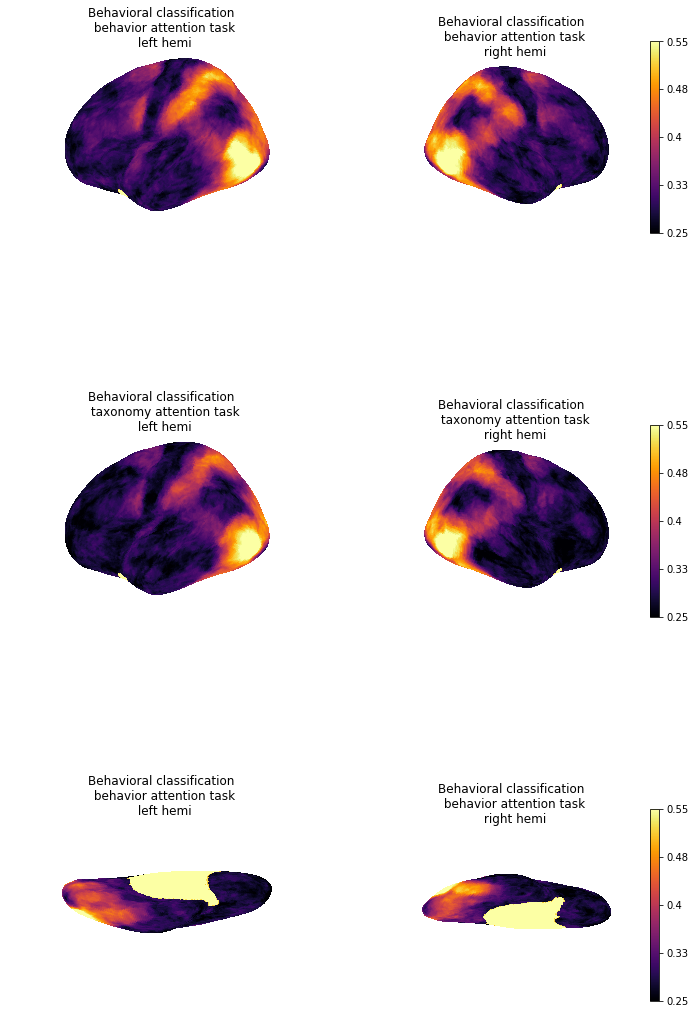

In [27]:
from nilearn.plotting import plot_surf
fsaverage_gii_L = os.path.join(main_dir , 'fs_templates', 'lh.pial.gii')
fsaverage_gii_R = os.path.join(main_dir , 'fs_templates', 'rh.pial.gii')
fsaverage_inflated_L = os.path.join(main_dir , 'fs_templates', 'lh.inflated.gii')
fsaverage_inflated_R = os.path.join(main_dir , 'fs_templates', 'rh.inflated.gii')

figure, axes = plt.subplots(3,2,subplot_kw={'projection': '3d'},figsize = (12,20))

# plot_surf(fsaverage_gii,np.mean(group_ds,axis = 0),colorbar = True)
plot_surf(fsaverage_inflated_L,mean_clbeh_behtask_L,
          title='Behavioral classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[0][0])
plot_surf(fsaverage_inflated_R,mean_clbeh_behtask_R, colorbar = True,  
          title='Behavioral classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[0][1])
plot_surf(fsaverage_inflated_L,mean_clbeh_taxtask_L,
          title='Behavioral classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[1][0])
plot_surf(fsaverage_inflated_R,mean_clbeh_taxtask_R,  colorbar = True, 
          title='Behavioral classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[1][1])
plot_surf(fsaverage_inflated_L,mean_clbeh_taxtask_L, 
          title='Behavioral classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'ventral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[2][0])
plot_surf(fsaverage_inflated_R,mean_clbeh_taxtask_R,  colorbar = True, 
          title='Behavioral classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'ventral', vmin=.25, vmax=.55, cmap = 'inferno',axes=axes[2][1])
plt.show()

## 3-2. behavior classification two-sample t-test 
* behavior classification for beh attention > tax attention task

* We hypothesized that the behavioral classification performance would be higher <br> for the 
behavior-attention task, as opposed to the taxonomy-attention task. 

In [15]:
q3_t_sample_L = scipy.stats.ttest_ind(clbeh_behtask_L , clbeh_taxtask_L)
q3_behtask_L = np.mean(clbeh_behtask_L.samples,axis = 0)
q3_taxtask_L = np.mean(clbeh_taxtask_L.samples,axis = 0)
q3_diff_L = q3_behtask_L-q3_taxtask_L
q3_diff_L[list(np.where(  abs(q3_t_sample_L.statistic) < 2.20)[0])] = 0

q3_t_sample_R = scipy.stats.ttest_ind(clbeh_behtask_R , clbeh_taxtask_R)
q3_behtask_R = np.mean(clbeh_behtask_R.samples,axis = 0)
q3_taxtask_R = np.mean(clbeh_taxtask_R.samples,axis = 0)
q3_diff_R = q3_behtask_R-q3_taxtask_R
q3_diff_R[list(np.where(  abs(q3_t_sample_R.statistic) < 2.20)[0])] = 0


/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/h/anaconda3/envs/pymvpa_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


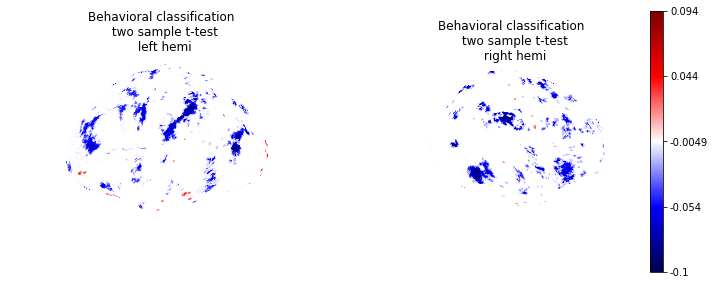

In [26]:
figure, axes = plt.subplots(1,2,subplot_kw={'projection': '3d'},figsize = (12,8))

plot_surf(fsaverage_inflated_L,q3_diff_L,  
          title='Behavioral classification \n two sample t-test\n left hemi', 
          hemi='left', view = 'lateral', cmap = 'seismic',axes=axes[0])

plot_surf(fsaverage_inflated_R,q3_diff_R,  colorbar = True, 
          title='Behavioral classification \n two sample t-test\n right hemi', 
          hemi='right', view = 'lateral', cmap = 'seismic',axes=axes[1])
plt.show()